In [20]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import os

def load_image(path):
    assert os.path.exists(path), path +' does not exist'
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def save_image(path, img):
    return cv2.imwrite(path, cv2.cvtColor(cv2.COLOR_RGB2BGR), img)

def show(img, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

In [21]:
output_paths = glob('output/*output*')
print(len(output_paths))

18


# DETECT

In [24]:
from shape_detect.pyimagesearch.shapedetector import ShapeDetector
import argparse
import imutils
import cv2


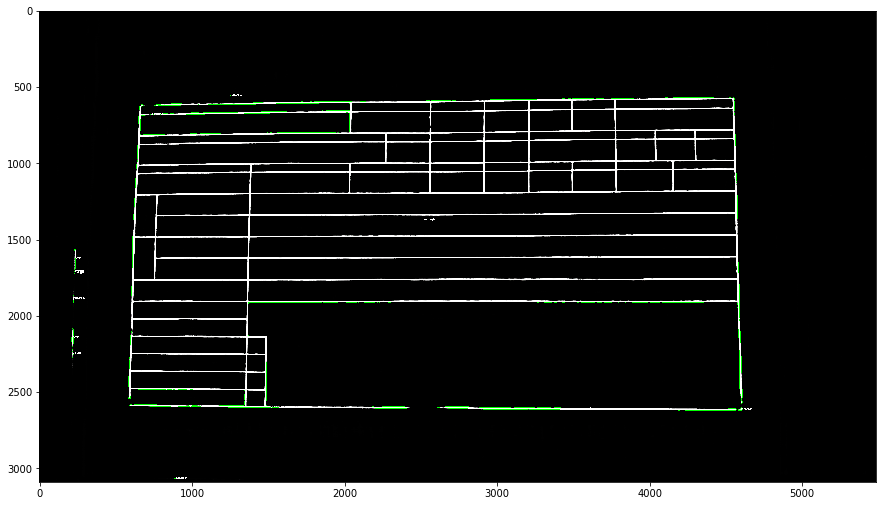

In [72]:
image = 255 - load_image(paths[0])

resized = imutils.resize(image, width=2000)
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
sd = ShapeDetector()

# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)

    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (255, 255, 255), 2)

show(image, (15, 15))

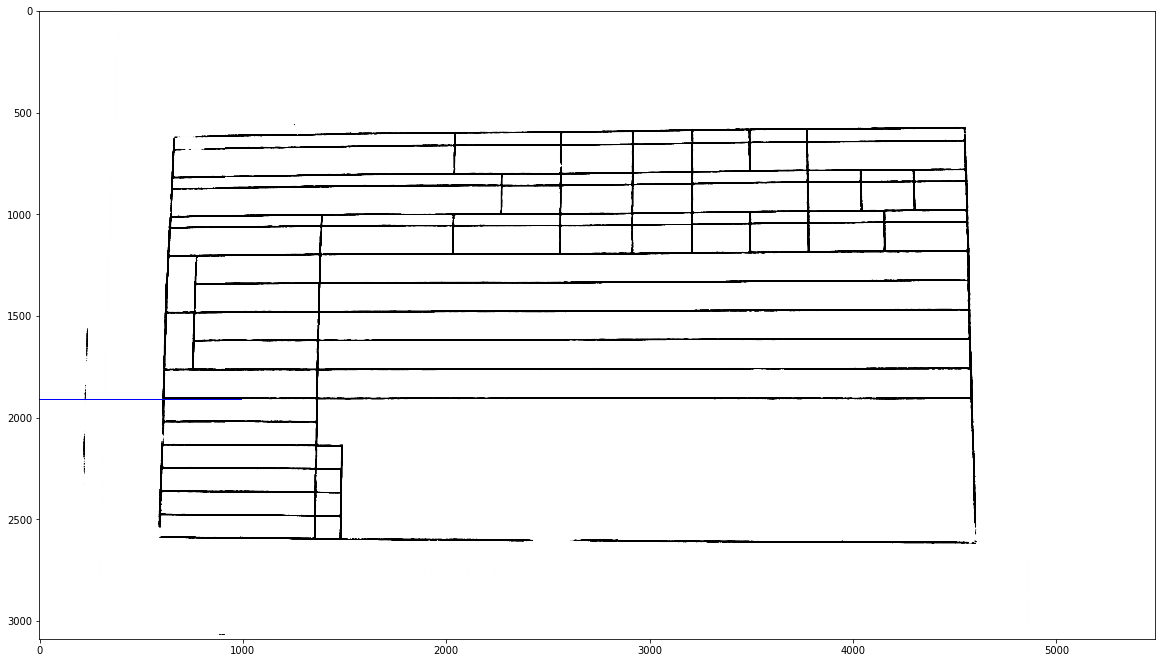

In [75]:
img = load_image(paths[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

show(img)